We are going to do some basic data analysis using Python, Pandas, and statsmodel. So first we need to load these libraries:

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

Lets extract the columns "Ad" catchment area and "Qb" water flux. This databse is not a standard csv file. THe separator is a tab, "\t", the second row contains units which we don't want to load, and the author chose to use commas to separate thousands.

In [2]:
df = pd.read_csv('./data/land2sea.txt',sep='\t',skiprows=[1],usecols=["Ad","Qb"],thousands=',')

Look at the data:

In [3]:
df.Ad.describe()

count    1.532000e+03
mean     6.191791e+04
std      3.011455e+05
min      1.300000e+01
25%      1.273750e+03
50%      4.900000e+03
75%      2.500000e+04
max      6.133120e+06
Name: Ad, dtype: float64

In [4]:
df.Qb.describe()

count    1278.000000
mean       23.354948
std       191.043316
min         0.003000
25%         0.712500
50%         2.600000
75%        11.000000
max      6300.000000
Name: Qb, dtype: float64

Plot histogram

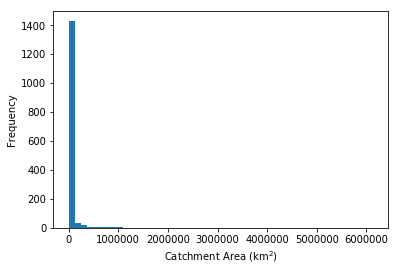

In [5]:
ax = df['Ad'].plot(kind='hist',bins=50)
ax.set_xlabel("Catchment Area (km$^2$)")
plt.show()

Scatter plot of the two varaibles

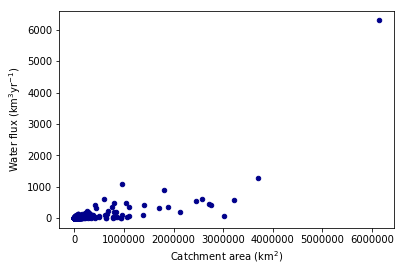

In [6]:
ax1 = df.plot.scatter(x='Ad',y='Qb', c='DarkBlue')
ax1.set_xlabel("Catchment area (km$^2$)")
ax1.set_ylabel("Water flux (km$^3$yr$^{-1}$)")
plt.show()

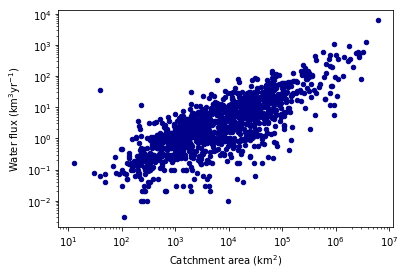

In [7]:
ax1 = df.plot.scatter(x='Ad',y='Qb', c='DarkBlue',loglog=True)
ax1.set_xlabel("Catchment area (km$^2$)")
ax1.set_ylabel("Water flux (km$^3$yr$^{-1}$)")
plt.show()

Calculate the fit to the data. First calculate new variables, the log of Ad and Qb. Then use a linear model to get the coefficient of regression.

In [8]:
df['Adlog'] = np.log10(df['Ad'])
df['Qblog'] = np.log10(df['Qb'])
X = df['Adlog']
y = df['Qblog']
model = sm.OLS(y,sm.add_constant(X),missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Qblog   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     1804.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):          2.55e-245
Time:                        13:23:44   Log-Likelihood:                -1040.1
No. Observations:                1261   AIC:                             2084.
Df Residuals:                    1259   BIC:                             2094.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2926      0.066    -34.710      0.000      -2.422      -2.163
Adlog          0.7161      0.017     42.473      0.000       0.683       0.749
==============================================================================
Omnibus:                      138.286   Durbin-Watson:                   1.566
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.529
Skew:                          -0.730   Prob(JB):                     9.70e-53
Kurtosis:                       4.557   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can then plot the fit.

In [9]:
model.params

const   -2.292559
Adlog    0.716109
dtype: float64

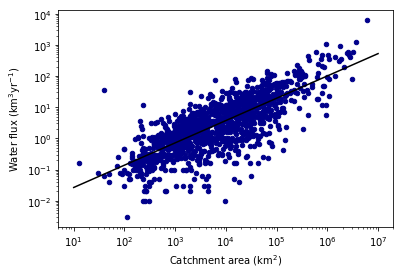

In [10]:
ax1 = df.plot.scatter(x='Ad',y='Qb', c='DarkBlue',loglog=True)
ax1.set_xlabel("Catchment area (km$^2$)")
ax1.set_ylabel("Water flux (km$^3$yr$^{-1}$)")
xx = np.arange(1e1,1e7)
yy = np.power(10,model.params[0])*np.power(xx,model.params[1])
plt.plot(xx,yy,'k')
plt.show()

Lets look at sediment flux grouped by climate zone. We will load in a different data set:

In [11]:
dfm = pd.read_csv('./data/milliman-farnsworth-database.csv',na_values=('<1','#VALUE!'))
dfm.columns.values
dfm.Max_Elev.describe()

count     1220
unique     150
top       >500
freq       135
Name: Max_Elev, dtype: object

In [12]:
dfm.Climate_T

0       STr
1       STr
2       STr
3       STr
4       STr
5       STr
6       STr
7       STr
8       STr
9       STr
10      STr
11      STr
12       Tr
13      Str
14       Te
15      STr
16      STr
17      STr
18      STr
19       Tr
20       Tr
21      STr
22      STr
23      STr
24      STr
25      STr
26      STr
27       Tr
28      STr
29      STr
       ... 
1226     Tr
1227    SAr
1228     Te
1229     Tr
1230     Tr
1231    STr
1232     Tr
1233     Tr
1234     Tr
1235    STr
1236     Tr
1237     Te
1238     Te
1239    SAr
1240     Te
1241     Te
1242     Te
1243     Te
1244     Tr
1245     Tr
1246     Tr
1247     Tr
1248     Te
1249     Tr
1250     Te
1251     Te
1252     Tr
1253    STr
1254     Te
1255    NaN
Name: Climate_T, Length: 1256, dtype: object

This former excel spreadsheet is a mess! We need to tidy it up a bit...

In [13]:
dfm['Max_Elev'] = dfm['Max_Elev'].apply(lambda x: np.nan if (str(x).startswith('>')) | (str(x).startswith('<')) else float(x))
dfm['Max_Elev'] = dfm['Max_Elev'].apply(lambda x: np.nan if (x < 10) else float(x))
dfm['Runoff'] = dfm['Runoff'].apply(lambda x: np.nan if (str(x).startswith('>')) | (str(x).startswith('<')) else float(x))
dfm['Q'] = dfm['Q'].apply(lambda x: np.nan if (x == 0.) else float(x))
dfm['Climate_T'] = dfm['Climate_T'].apply(lambda x: "STr" if (x == "Str") else x)
dfm['Area'] = dfm['Area, km^2']

Plot sediment flux as a function of catchment area

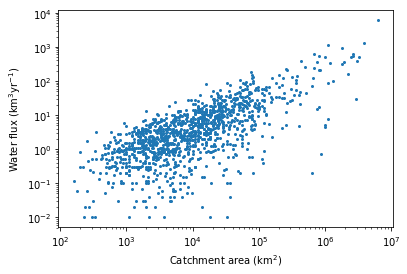

In [14]:
plt.loglog(dfm.Area, dfm.Q, marker='o', linestyle='', ms=2)
plt.xlabel("Catchment area (km$^2$)")
plt.ylabel("Water flux (km$^3$yr$^{-1}$)")
plt.show()

Lets plot the scatter grouped by climate

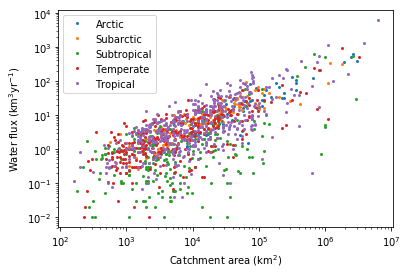

In [15]:
groups = dfm.groupby('Climate_T')
for Climate_T, group in groups:
    plt.loglog(group.Area, group.Q, marker='o', linestyle='', ms=2, label=Climate_T)
plt.legend(('Arctic','Subarctic','Subtropical','Temperate','Tropical'))
plt.xlabel("Catchment area (km$^2$)")
plt.ylabel("Water flux (km$^3$yr$^{-1}$)")
plt.show()

Can you get linear regression for each climate?

In [ ]:
dfm['logA'] = np.log10(dfm['Area'])
dfm['logQ'] = np.log10(dfm['Q'])
groups = dfm.groupby('Climate_T')
for Climate_T, group in groups:
    model = sm.OLS(group.logQ,sm.add_constant(group.logA),missing='drop').fit()
    xx = np.arange(1e2,1e7)
    yy = np.power(10,model.params[0])*np.power(xx,model.params[1])
    plt.loglog(xx,yy)
plt.legend(('Arctic','Subarctic','Subtropical','Temperate','Tropical'))
plt.xlabel("Catchment area (km$^2$)")
plt.ylabel("Water flux (km$^3$yr$^{-1}$)")
plt.show()

We can extract model summaries for different grouped catagories... 

In [ ]:
X = groups['logA'].get_group('STr')
y = groups['logQ'].get_group('STr')
model = sm.OLS(y,sm.add_constant(X),missing='drop').fit()
model.summary()

In [ ]:
X = groups['logA'].get_group('Te')
y = groups['logQ'].get_group('Te')
model = sm.OLS(y,sm.add_constant(X),missing='drop').fit()
model.summary()